In [105]:
import pandas as pd # Para a instalação da biblioteca PANDAS
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree  # árvore de decisão e função de plotagem
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.svm import SVC
import seaborn as sns # Para a instalação da biblioteca SEABORN
import matplotlib.pyplot as plt # Para a instalação da biblioteca MATPLOTLIB


In [106]:
tabela_dados = r'c:\Users\dsadm\Desktop\formativa\dados_produtos.csv'  # Adição da tabela de dados para a continuação do código


In [107]:
df = pd.read_csv(tabela_dados) # Ler os dados

print(df.head()) # Mostrar os dados

  product_name  rating  rating_count  purchased
0    Televisão    3.04            29          1
1      Celular    3.46          3872          0
2    Cafeteira    3.25          1187          0
3    Televisão    3.77          4097          1
4    Videogame    5.00          4738          1


In [108]:
print(df.info()) # Mostrar informações da base de dados 
print(df.describe()) # Mostrar a descrição dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None
           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00


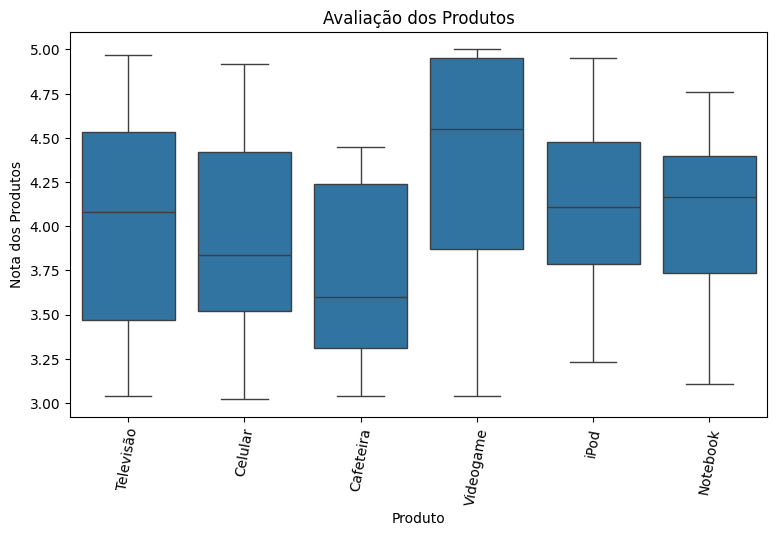

In [109]:
plt.figure(figsize=(9, 5)) # Definir o tamanho da figura do boxplot
sns.boxplot(x='product_name', y='rating', data=df) # Trocar os nomes pelos nomes dos produtos presentes
plt.title('Avaliação dos Produtos') # Definindo o título
plt.xlabel('Produto') # Definindo o legenda dos produtos na parte inferior
plt.ylabel('Nota dos Produtos') # Definindo a legenda da nota dos produtos na esquerda do boxplot
plt.xticks(rotation=80) # Rotação dos nomes dos produtos
plt.show() # Mostrar boxplot depois das alterações feitas

In [110]:
df = df.drop_duplicates() # Remover dados duplicados

In [111]:
df = df.dropna() # Remover linhs com dados faltando

In [112]:
print(df.info()) # Mostrar as informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None


In [113]:
x = df[['rating','rating_count']]
y = df[['purchased']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)


Mean Squared Error: 0.6
0.6 [[ 3  2]
 [10  5]]


[Text(0.46296296296296297, 0.9666666666666667, '3.46 <= 1962.5\nsquared_error = 0.25\nsamples = 80\nvalue = 0.5'),
 Text(0.2962962962962963, 0.9, '3.04 <= 4.265\nsquared_error = 0.211\nsamples = 33\nvalue = 0.303'),
 Text(0.37962962962962965, 0.9333333333333333, 'True  '),
 Text(0.2222222222222222, 0.8333333333333334, '3.04 <= 3.61\nsquared_error = 0.149\nsamples = 22\nvalue = 0.182'),
 Text(0.18518518518518517, 0.7666666666666667, '3.04 <= 3.515\nsquared_error = 0.231\nsamples = 11\nvalue = 0.364'),
 Text(0.14814814814814814, 0.7, '3.46 <= 1458.5\nsquared_error = 0.21\nsamples = 10\nvalue = 0.3'),
 Text(0.07407407407407407, 0.6333333333333333, '3.04 <= 3.465\nsquared_error = 0.139\nsamples = 6\nvalue = 0.167'),
 Text(0.037037037037037035, 0.5666666666666667, 'squared_error = 0.0\nsamples = 4\nvalue = 0.0'),
 Text(0.1111111111111111, 0.5666666666666667, '3.04 <= 3.5\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.07407407407407407, 0.5, 'squared_error = 0.0\nsamples = 1\nval

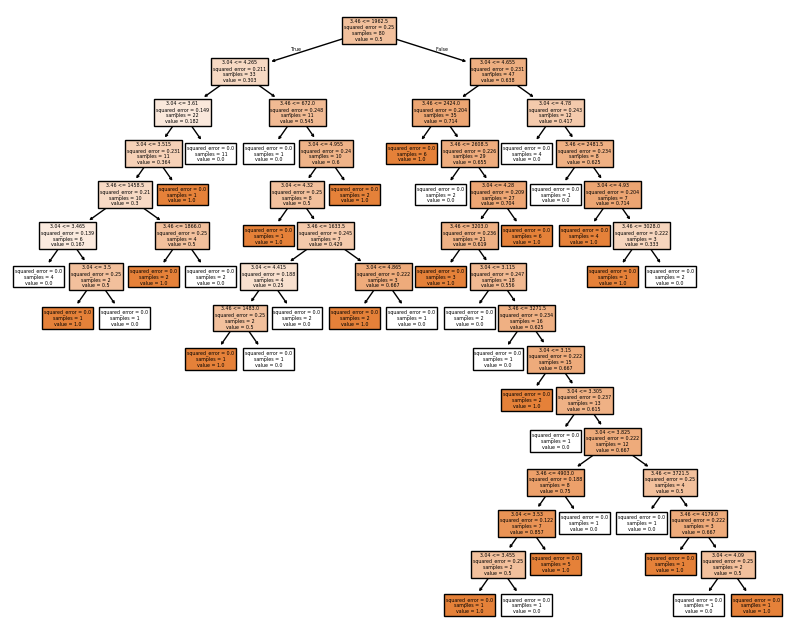

In [114]:
x = df[['rating', 'rating_count']]
y = df['purchased']
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,
                                                     test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(x_treino, y_treino)
prev = model.predict(x_teste)
mse = mean_squared_error(y_teste, prev)
print("Mean Squared Error:", mse)
matrix = confusion_matrix(y_teste,prev)
print(mse, matrix)
df['purchased'] = df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model, feature_names=df['rating'].tolist(), class_names=df['purchased'].unique().tolist(), filled=True)

In [115]:
df = pd.read_csv('dados_produtos.csv')  # 1. Ler os dados do CSV
produtos = df['product_name'].unique()  # 2. Obter a lista de produtos únicos
modelos_resultados = {}  # 3. Criar dicionário para armazenar resultados

In [116]:
for produto in produtos:  # 4. Iterar sobre cada produto e treinar um modelo
    dados_produto = df[df['product_name'] == produto]  # Filtrar dados para o produto atual

    if len(dados_produto) < 5:  # Verificar se há dados suficientes para treinar o modelo
        print(f"Produto '{produto}' possui dados insuficientes para treinar o modelo.")
        continue

In [117]:
X = dados_produto[['rating', 'rating_count']]  # Definir características
y = dados_produto['rating']  # Variável alvo

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Dividir os dados em conjunto de treinamento e teste

modelo = DecisionTreeRegressor(random_state=42)  # Criar o modelo de árvore de decisão
modelo.fit(X_train, y_train)  # Treinar o modelo

DecisionTreeRegressor(random_state=42)

In [119]:

y_pred = modelo.predict(X_test)  # Fazer previsões
mse = mean_squared_error(y_test, y_pred)  # Avaliar o modelo

modelos_resultados[produto] = {  # Armazenar resultados
    'modelo': modelo,
    'mse': mse
}

In [120]:
print(f'Modelo para o produto "{produto}" treinado com MSE: {mse:.2f}')  # Exibir MSE do modelo

Modelo para o produto "Notebook" treinado com MSE: 0.10


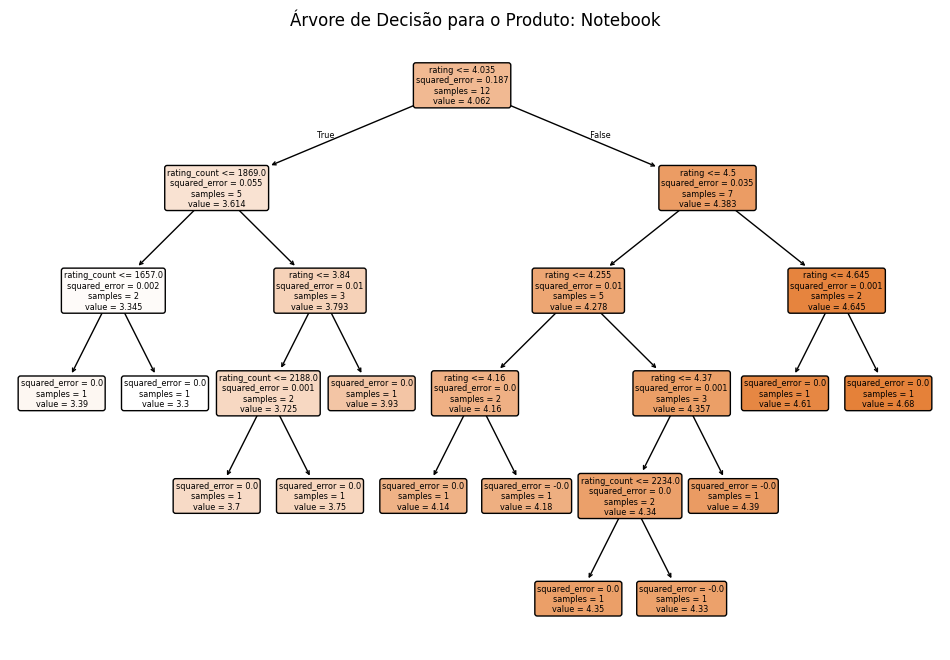

In [121]:
plt.figure(figsize=(12, 8))  # Visualizar a árvore de decisão
plot_tree(modelo, feature_names=['rating', 'rating_count'], filled=True, rounded=True)  # Plotar a árvore
plt.title(f'Árvore de Decisão para o Produto: {produto}')  # Título do gráfico
plt.show()  # Mostrar o gráfico

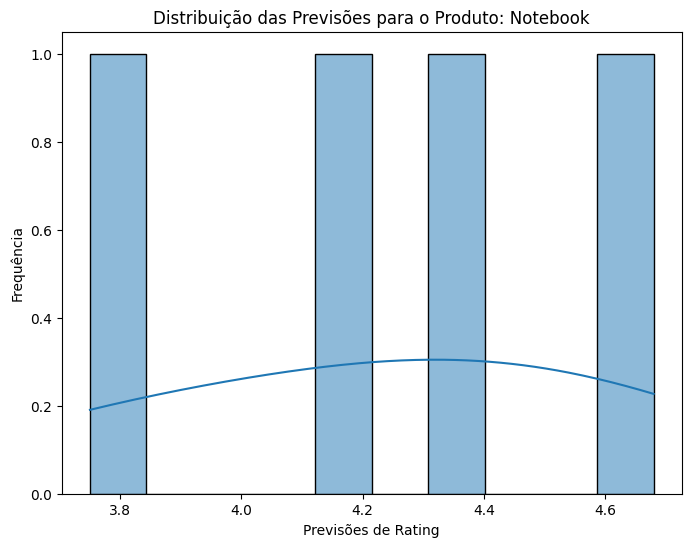

In [122]:
plt.figure(figsize=(8, 6))  # Plotar a distribuição das previsões
sns.histplot(y_pred, bins=10, kde=True)  # Criar o histograma
plt.title(f'Distribuição das Previsões para o Produto: {produto}')  # Título do gráfico
plt.xlabel('Previsões de Rating')  # Rótulo do eixo X
plt.ylabel('Frequência')  # Rótulo do eixo Y
plt.show()  # Mostrar o gráfico

In [123]:
dados_produto['rating'] = dados_produto['rating'].astype(int)  # Converter a coluna de avaliação em classes discretas

X = dados_produto[['rating', 'rating_count']]  # Definir características
y = dados_produto['rating']  # Variável alvo

C:\Users\dsadm\AppData\Local\Temp\ipykernel_772\2426002698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)  # Converter a coluna de avaliação em classes discretas


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)  # Dividir os dados em conjunto de treinamento e teste


In [125]:
modelo = DecisionTreeClassifier(random_state=42)  # Criar o modelo de árvore de decisão
modelo.fit(X_train, y_train)  # Treinar o modelo

DecisionTreeClassifier(random_state=42)

In [126]:
y_pred = modelo.predict(X_test)  # Fazer previsões

In [127]:
acc = accuracy_score(y_test, y_pred)  # Calcular a acurácia
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Calcular a precisão
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Calcular o recall
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Calcular o F1-Score
conf_matrix = confusion_matrix(y_test, y_pred)  # Calcular a matriz de confusão

modelos_resultados[produto] = {  # Armazenar resultados
    'modelo': modelo,
    'accuracy': acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': conf_matrix
    }


Modelo para o produto "Notebook":
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00
Matriz de Confusão:
[[1 0]
 [0 3]]


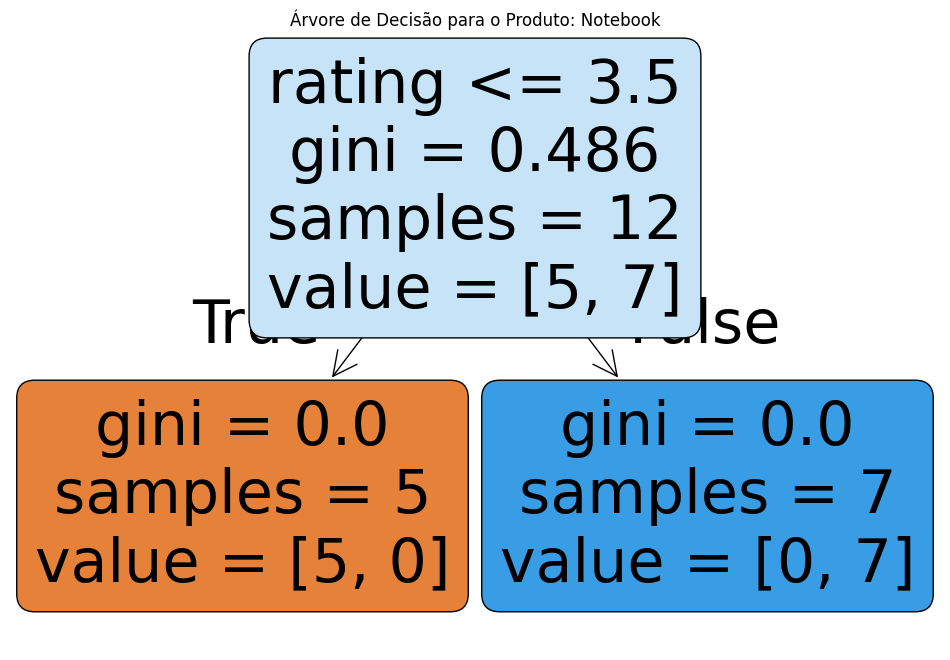

In [128]:
print(f'\nModelo para o produto "{produto}":')  # Exibir informações do modelo
print(f'Acurácia: {acc:.2f}')  # Exibir acurácia
print(f'Precisão: {precision:.2f}')  # Exibir precisão
print(f'Recall: {recall:.2f}')  # Exibir recall
print(f'F1-Score: {f1:.2f}')  # Exibir F1-Score
print(f'Matriz de Confusão:\n{conf_matrix}')  # Exibir matriz de confusão

plt.figure(figsize=(12, 8))  # Visualizar a árvore de decisão
plot_tree(modelo, feature_names=['rating', 'rating_count'], filled=True, rounded=True)  # Plotar a árvore
plt.title(f'Árvore de Decisão para o Produto: {produto}')  # Título do gráfico
plt.show()  # Mostrar o gráfico

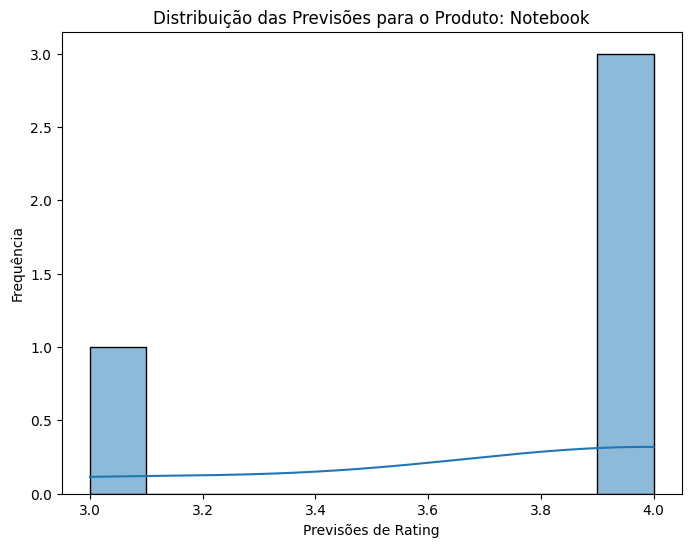

In [129]:
plt.figure(figsize=(8, 6))  # Plotar a distribuição das previsões
sns.histplot(y_pred, bins=10, kde=True)  # Criar o histograma
plt.title(f'Distribuição das Previsões para o Produto: {produto}')  # Título do gráfico
plt.xlabel('Previsões de Rating')  # Rótulo do eixo X
plt.ylabel('Frequência')  # Rótulo do eixo Y
plt.show()  # Mostrar o gráfico1

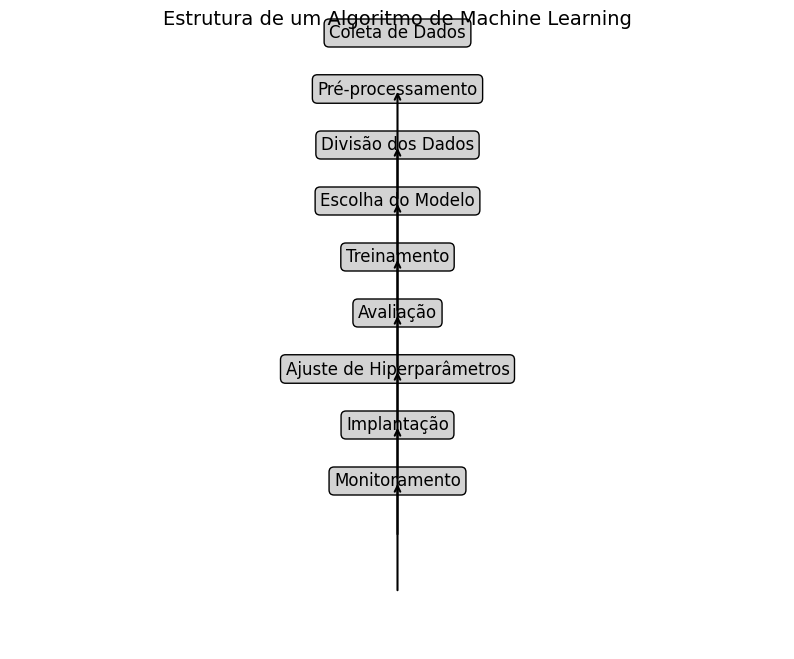

In [131]:

# Definindo as etapas do algoritmo
etapas = [
    "Coleta de Dados",
    "Pré-processamento",
    "Divisão dos Dados",
    "Escolha do Modelo",
    "Treinamento",
    "Avaliação",
    "Ajuste de Hiperparâmetros",
    "Implantação",
    "Monitoramento"
]

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 8))

# Plotando as etapas
for i, etapa in enumerate(etapas):
    ax.text(0.5, 1 - (i * 0.1), etapa, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'))

# Ajustando os limites e removendo eixos
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1)
ax.axis('off')

# Adicionando setas
for i in range(len(etapas) - 1):
    ax.annotate("", xy=(0.5, 0.9 - (i * 0.1)), xytext=(0.5, 0.8 - ((i + 1) * 0.1)),
                arrowprops=dict(arrowstyle="->", lw=1.5))

# Título
plt.title('Estrutura de um Algoritmo de Machine Learning', fontsize=14)
plt.show()
